In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
orders = pd.read_excel(r'D:\Selfstud\Data Analyst\Unigap\Python\Final_project_RFM\Dataset.xlsx', sheet_name = 'Orders')
product = pd.read_excel(r'D:\Selfstud\Data Analyst\Unigap\Python\Final_project_RFM\Dataset.xlsx', sheet_name = 'Product')
location = pd.read_excel(r'D:\Selfstud\Data Analyst\Unigap\Python\Final_project_RFM\Dataset.xlsx', sheet_name = 'Location')
customer = pd.read_excel(r'D:\Selfstud\Data Analyst\Unigap\Python\Final_project_RFM\Dataset.xlsx', sheet_name = 'Customer')
returns = pd.read_excel(r'D:\Selfstud\Data Analyst\Unigap\Python\Final_project_RFM\Dataset.xlsx', sheet_name = 'Return')
segmentation = pd.read_excel(r'D:\Selfstud\Data Analyst\Unigap\Python\Final_project_RFM\Dataset.xlsx', sheet_name = 'Segmentation')

In [3]:
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926


In [4]:
product.head()

,Row ID,Product ID,Category,Sub-Category,Product Name
0,1,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase
1,2,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,..."
2,3,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...
3,4,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table
4,5,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Row ID       9994 non-null   int64         
 1   Order ID     9994 non-null   object        
 2   Order Date   9994 non-null   datetime64[ns]
 3   Ship Date    9994 non-null   datetime64[ns]
 4   Ship Mode    9994 non-null   object        
 5   Customer ID  9994 non-null   object        
 6   Channel      9994 non-null   object        
 7   Postal Code  9994 non-null   int64         
 8   Product ID   9994 non-null   object        
 9   Sales        9994 non-null   float64       
 10  Quantity     9994 non-null   int64         
 11  Unit Cost    9994 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(5)
memory usage: 937.1+ KB


In [6]:
rfm =orders.merge(customer, on='Customer ID', suffixes=('_a','_b'))
rfm

,Row ID_a,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Row ID_b,Customer Name
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,255,Chuck Clark
1,3046,CA-2017-125290,2017-11-06,2017-11-10,Second Class,CC-12430,Home Office,55407,OFF-AR-10001216,13.900,5,2.0572,255,Chuck Clark
2,3047,CA-2017-125290,2017-11-06,2017-11-10,Second Class,CC-12430,Home Office,55407,OFF-PA-10003127,26.380,1,14.2452,255,Chuck Clark
3,6372,CA-2017-143035,2017-10-03,2017-10-05,Second Class,CC-12430,Home Office,10009,FUR-FU-10001934,83.920,4,15.5252,255,Chuck Clark
4,6373,CA-2017-143035,2017-10-03,2017-10-05,Second Class,CC-12430,Home Office,10009,OFF-AR-10001130,6.630,3,1.1713,255,Chuck Clark
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,5393,US-2014-123183,2014-11-19,2014-11-25,Standard Class,GR-14560,Corporate,19805,OFF-LA-10001569,9.960,2,2.6892,745,Georgia Rosenberg
9990,5394,US-2014-123183,2014-11-19,2014-11-25,Standard Class,GR-14560,Corporate,19805,OFF-BI-10002429,213.080,7,15.8288,745,Georgia Rosenberg
9991,5395,US-2014-123183,2014-11-19,2014-11-25,Standard Class,GR-14560,Corporate,19805,FUR-BO-10000362,1025.880,6,131.6546,745,Georgia Rosenberg
9992,7665,CA-2014-151967,2014-10-22,2014-10-26,Standard Class,NB-18580,Corporate,71111,FUR-FU-10000193,129.920,4,29.8816,631,Nicole Brennan


In [7]:
last_date = datetime.datetime(2017, 12, 31)
recency = rfm.groupby('Customer ID')['Order Date'].max().apply(lambda x: (last_date - x).days)
recency.name = 'Recency'

frequency = rfm.groupby('Customer ID')['Order ID'].nunique()
frequency.name = 'Frequency'

monetary = rfm.groupby('Customer ID')['Sales'].sum()
monetary.name = 'Monetary'

rfm = pd.concat([recency, frequency, monetary], axis=1)
rfm = rfm.reset_index()

print(rfm)


    Customer ID  Recency  Frequency  Monetary
0      AA-10315      185          5  5563.560
1      AA-10375       20          9  1056.390
2      AA-10480      260          4  1790.512
3      AA-10645       56          6  5086.935
4      AB-10015      416          3   886.156
..          ...      ...        ...       ...
788    XP-21865       44         11  2374.658
789    YC-21895        5          5  5454.350
790    YS-21880       10          8  6720.444
791    ZC-21910       55         13  8025.707
792    ZD-21925      203          5  1493.944

[793 rows x 4 columns]


In [8]:
rfm['r_quintile'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['f_quintile'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['m_quintile'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['rfm_score'] = rfm['r_quintile'].astype(str) + rfm['f_quintile'].astype(str) +  rfm['m_quintile'].astype(str)
rfm

,Customer ID,Recency,Frequency,Monetary,r_quintile,f_quintile,m_quintile,rfm_score
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,1,1,3,113
3,AA-10645,56,6,5086.935,3,3,5,335
4,AB-10015,416,3,886.156,1,1,1,111
...,...,...,...,...,...,...,...,...
788,XP-21865,44,11,2374.658,4,5,3,453
789,YC-21895,5,5,5454.350,5,2,5,525
790,YS-21880,10,8,6720.444,5,4,5,545
791,ZC-21910,55,13,8025.707,3,5,5,355


In [9]:
segmentation

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425, 4..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214, 215, 115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [10]:
segmentation['RFM Score'] = segmentation['RFM Score'].str.split(', ')
segmentation = segmentation.explode('RFM Score')

rfm = pd.merge(rfm, segmentation, left_on = 'rfm_score', right_on='RFM Score')

print(rfm)

    Customer ID  Recency  Frequency   Monetary r_quintile f_quintile  \
0      AA-10315      185          5  5563.5600          2          2   
1      DW-13480      218          5  5271.6280          2          2   
2      TP-21415      105          5  5329.0048          2          2   
3      AA-10375       20          9  1056.3900          5          5   
4      GA-14725        6         11  1398.3820          5          5   
..          ...      ...        ...        ...        ...        ...   
788    RS-19420       77          5  3221.2900          3          2   
789    RW-19690       80          5  3495.6460          3          2   
790    RF-19345      391          8  3309.1500          1          4   
791    RF-19840        7          8   945.2220          5          4   
792    SV-20785      321          9  4105.3050          1          5   

    m_quintile rfm_score             Segment RFM Score  
0            5       225             At Risk       225  
1            5       

In [11]:
customer_count = rfm['Segment'].value_counts()
print(customer_count)

Potential Loyalist       118
At Risk                  105
Hibernating customers     99
Champions                 80
Lost customers            76
Need Attention            71
Loyal                     63
New Customers             59
Promising                 52
About To Sleep            42
Cannot Lose Them          28
Name: Segment, dtype: int64


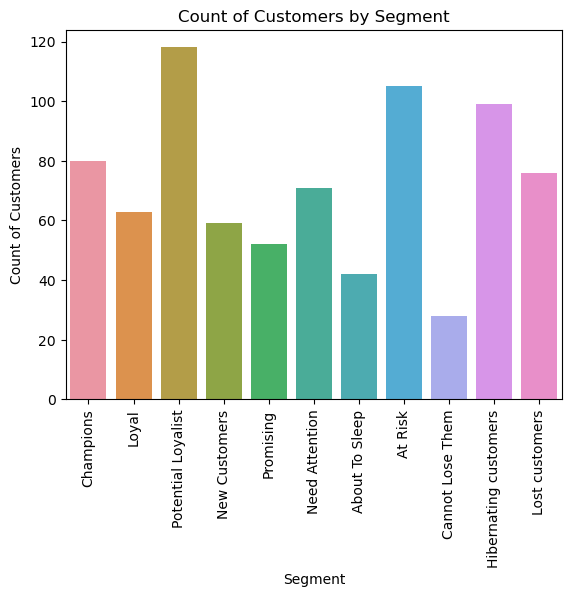

In [12]:
sns.countplot(x="Segment", data=rfm, order=['Champions','Loyal','Potential Loyalist','New Customers','Promising','Need Attention','About To Sleep','At Risk','Cannot Lose Them','Hibernating customers','Lost customers'])
plt.title("Count of Customers by Segment")
plt.xlabel("Segment")
plt.xticks(rotation = 90)
plt.ylabel("Count of Customers")
plt.show()

In [13]:
!pip install squarify -qqq
import squarify

In [14]:
rfm_treemap = rfm.groupby('Segment').agg(
    customers=('Customer ID', 'count'),
    mean_rfm =('RFM Score','median'),
).reset_index()

rfm_treemap.head()

,Segment,customers,mean_rfm
0,About To Sleep,42,246.0
1,At Risk,105,235.0
2,Cannot Lose Them,28,114.0
3,Champions,80,544.0
4,Hibernating customers,99,212.0


In [15]:
rfm_treemap['percentage']=round(100*rfm_treemap['customers']/(rfm['Customer ID'].count()),2)
rfm_treemap

,Segment,customers,mean_rfm,percentage
0,About To Sleep,42,246.0,5.30
1,At Risk,105,235.0,13.24
2,Cannot Lose Them,28,114.0,3.53
3,Champions,80,544.0,10.09
4,Hibernating customers,99,212.0,12.48
5,Lost customers,76,111.0,9.58
6,Loyal,63,355.0,7.94
7,Need Attention,71,434.0,8.95
8,New Customers,59,412.0,7.44
9,Potential Loyalist,118,433.0,14.88


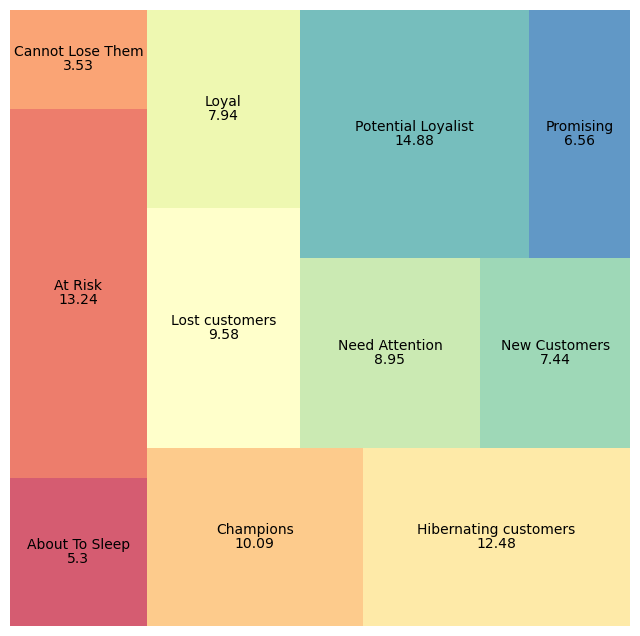

In [16]:
fig, ax = plt.subplots(1, figsize = (8,8))
squarify.plot(sizes=rfm_treemap['customers'],
              value=rfm_treemap['percentage'],
              label=rfm_treemap['Segment'],
              alpha=.8,
              color= sns.color_palette("Spectral",
                                     11))
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'The average sales by segment')

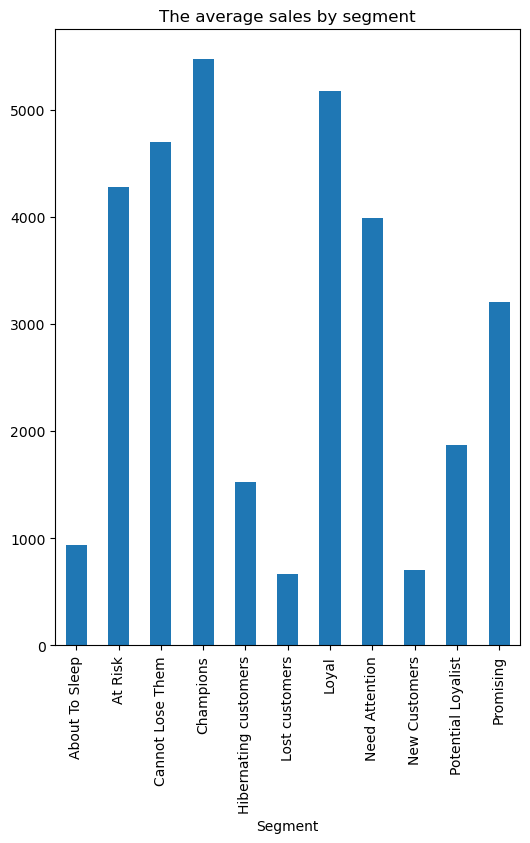

In [17]:
rfm.groupby('Segment')['Monetary'].mean().plot.bar(figsize = (6, 8))
plt.title('The average sales by segment')

Text(0.5, 1.0, 'The average frequency by segment')

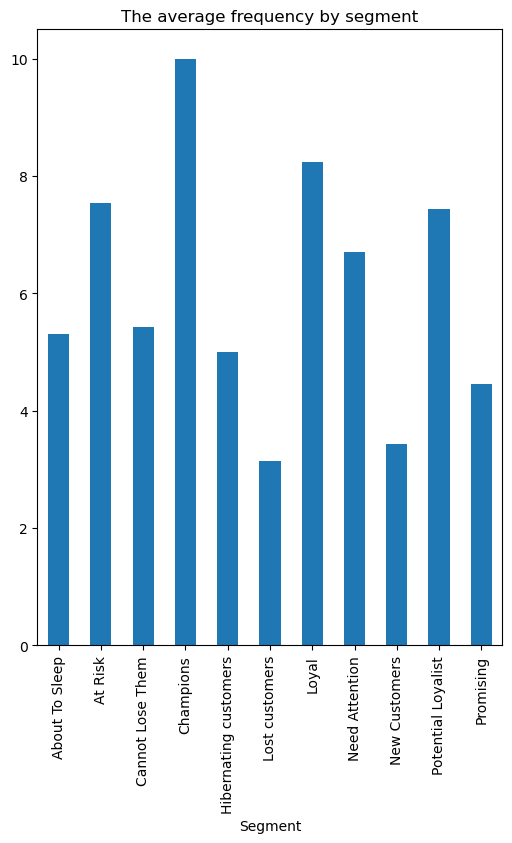

In [18]:
rfm.groupby('Segment')['Frequency'].mean().plot.bar(figsize = (6, 8))
plt.title('The average frequency by segment')

Text(0.5, 1.0, 'The average date of purchase by segment')

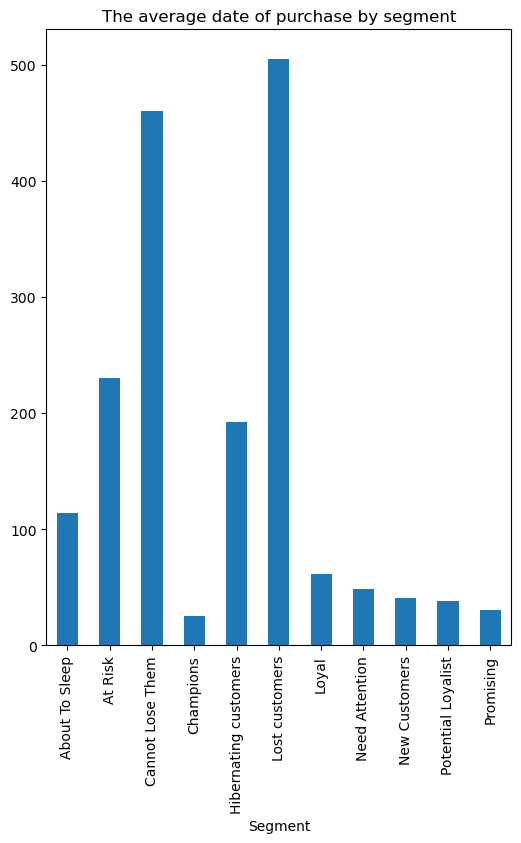

In [19]:
rfm.groupby('Segment')['Recency'].mean().plot.bar(figsize = (6, 8))
plt.title('The average date of purchase by segment')